<h1 style="text-align: center;"> Mini Project Machine Learning 1</h1>

***
**Customer attrition is a major issue for businesses, as it leads to a loss of revenue and clients. Customer attrition refers to the loss of customers or subscribers, regardless of the reason. Companies measure and track the attrition rate as a percentage of lost customers compared to the total number of customers over a given period. This metric is typically monitored monthly and reported at the end of the month. Therefore, it is important to identify customers who are likely to unsubscribe and take appropriate measures to retain them. Here we build a model to predict customer churn using a dataset of our choice.**
***

<h2 style="color: green;">I) Dataset Description</h2>

<h3 style="color: brown;">Importing the necessary libraries</h3>

<p><b>Importing the necessary libraries, including pandas, numpy, matplotlib, ipywidgets, seaborn, and missingno. These libraries are used to perform various tasks such as data analysis, interactive visualization, and displaying missing values in a dataset.</b></p>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from  ipywidgets import interact, interactive
import seaborn as sns
import missingno as msno

<h3 style="color: brown;">Loading the dataset</h3>

<p><b> The code imports a dataset from a CSV file named 'telecom_customer_churn.csv' and stores it in a variable called dataset using the pandas library.</b></p>

In [2]:
dataset = pd.read_csv('telecom_customer_churn.csv')

<h3 style="color: brown;">Displaying the first few rows of the dataset</h3>

In [3]:
dataset.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


<p><b>This output shows the first five entries of the dataset. Each row represents a customer, and the columns include information such as Customer ID, Gender, Age, Marital Status ("Married"), Number of Dependents, City, Zip Code, Latitude, Longitude, and more. These data provide an overview of the available variables and their initial values.</b></p>

<h3 style="color: brown;"> Dataset Dimensions</h3>

In [4]:
dataset.shape

(7043, 38)

<p><b>The shape of the dataset is (7043, 38), indicating that there are 7043 entries (rows) and 38 variables (columns) in the dataset. This means the dataset contains information on 7043 customers and 38 different features available for each customer.</b></p>

<h3 style="color: brown;">Dataset Informations</h3>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

<b><p>This result comes from calling the info() method on the dataset, providing crucial informations :</p></b>

<b><p>- The dataset contains 7043 entries and 38 columns.</p></b>
<b><p>- The data types include float64, int64, and object.</p></b>
<b><p>- Some columns have missing values, such as "Offer", "Avg Monthly Long Distance Charges", "Internet Type", etc.</p></b>
<b><p>- The total memory used by the dataset is approximately 2.0 MB.</p></b></br>
<b><p>Those informations are essential for assessing data quality and identifying columns that require handling of missing values.</p></b>

<h3 style="color: brown;">Descriptive Statistics of the Dataset</h3>

In [6]:
dataset.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


<p><b>These descriptive statistics summarize the numerical characteristics of the dataset :</b></p>
</br>
<b><p>- The average age is around 46 years, ranging from 19 to 80 years.</p></b>
<b><p>- On average, customers have about 0.47 dependents.</p></b>
<b><p>- Statistical values for zip codes, latitudes, and longitudes provide a geographic overview.</p></b>
<b><p>- The average monthly bill is approximately 63.60, with a range from -10 to 118.75.</p></b>
<b><p>- Total charges vary significantly, ranging from 18.80 to 8684.80 on average.</p></b></br>
<p><b>These statistics provide an overall view of the numerical data in the dataset.</b></p>

<h3 style="color: brown;">Basic Informations About the Dataset</h3>

In [7]:
basic_info = pd.DataFrame({'Colonne' : dataset.columns,
                           'Type' :  dataset.dtypes.values,
                           'Modalité' :  dataset.nunique().values, # Check the number of unique values of each column
                           })
basic_info

,Colonne,Type,Modalité
0,Customer ID,object,7043
1,Gender,object,2
2,Age,int64,62
3,Married,object,2
4,Number of Dependents,int64,10
5,City,object,1106
6,Zip Code,int64,1626
7,Latitude,float64,1626
8,Longitude,float64,1625
9,Number of Referrals,int64,12


<p><b>The table above presents basic information about the columns in the dataset :</b></p></br>
<b><p>- The "Columns" field shows the names of the various variables in the dataset.</p></b>
<b><p>- The "Data Type" field indicates the respective data types for each variable.</p></b>
<b><p>- The "No. of unique values" field gives the number of unique values present in each variable.</p></b></br>
<p><b>Those informations are useful for understanding the diversity of data in each column of the dataset.</b></p>

<h3 style="color: brown;">Unique Values for Each Column</h3>

<p><b>The lists below show the unique values for each column in the dataset :</b></p>

In [8]:
for i in dataset.columns:
    print(i, ": \n\n", dataset[i].unique())

Customer ID : 

 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender : 

 ['Female' 'Male']
Age : 

 [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Married : 

 ['Yes' 'No']
Number of Dependents : 

 [0 3 1 2 4 6 5 9 7 8]
City : 

 ['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Zip Code : 

 [93225 91206 92627 ... 91934 93013 95956]
Latitude : 

 [34.827662 34.162515 33.645672 ... 32.649787 34.441398 39.937017]
Longitude : 

 [-118.999073 -118.203869 -117.922613 ... -116.2237   -119.513163
 -121.058043]
Number of Referrals : 

 [ 2  0  1  3  8  9 10  5  4  7  6 11]
Tenure in Months : 

 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 4

<h3 style="color: brown;">Missing Values in the Dataset</h3>

In [9]:
dataset.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

<p><b>The table shows the number of missing values for each column in the dataset. Here are some key points :</b></p></br>
<b><p>- Columns such as "Offer", "Avg Monthly Long Distance Charges", "Internet Type", etc., have missing values.</p></b>
<b><p>- Columns related to Internet services have 1526 missing values, potentially indicating customers without Internet services.</p></b>
<b><p>- The "Churn Category" and "Churn Reason" columns have a significant number of missing values (5174), which may be due to customers who have not churned.</p></b></br>
<p><b>Those informations are important for deciding how to handle missing values during the data cleaning process.</b></p>

<h3 style="color: brown;">Missing Values Matrix in the Dataset</h3>

<p><b>Missingo Installation :</b></p>

In [10]:
#pip install missingo

<p><b>The matrix below visualizes the distribution of missing values in the dataset :</b></p>

<Axes: >

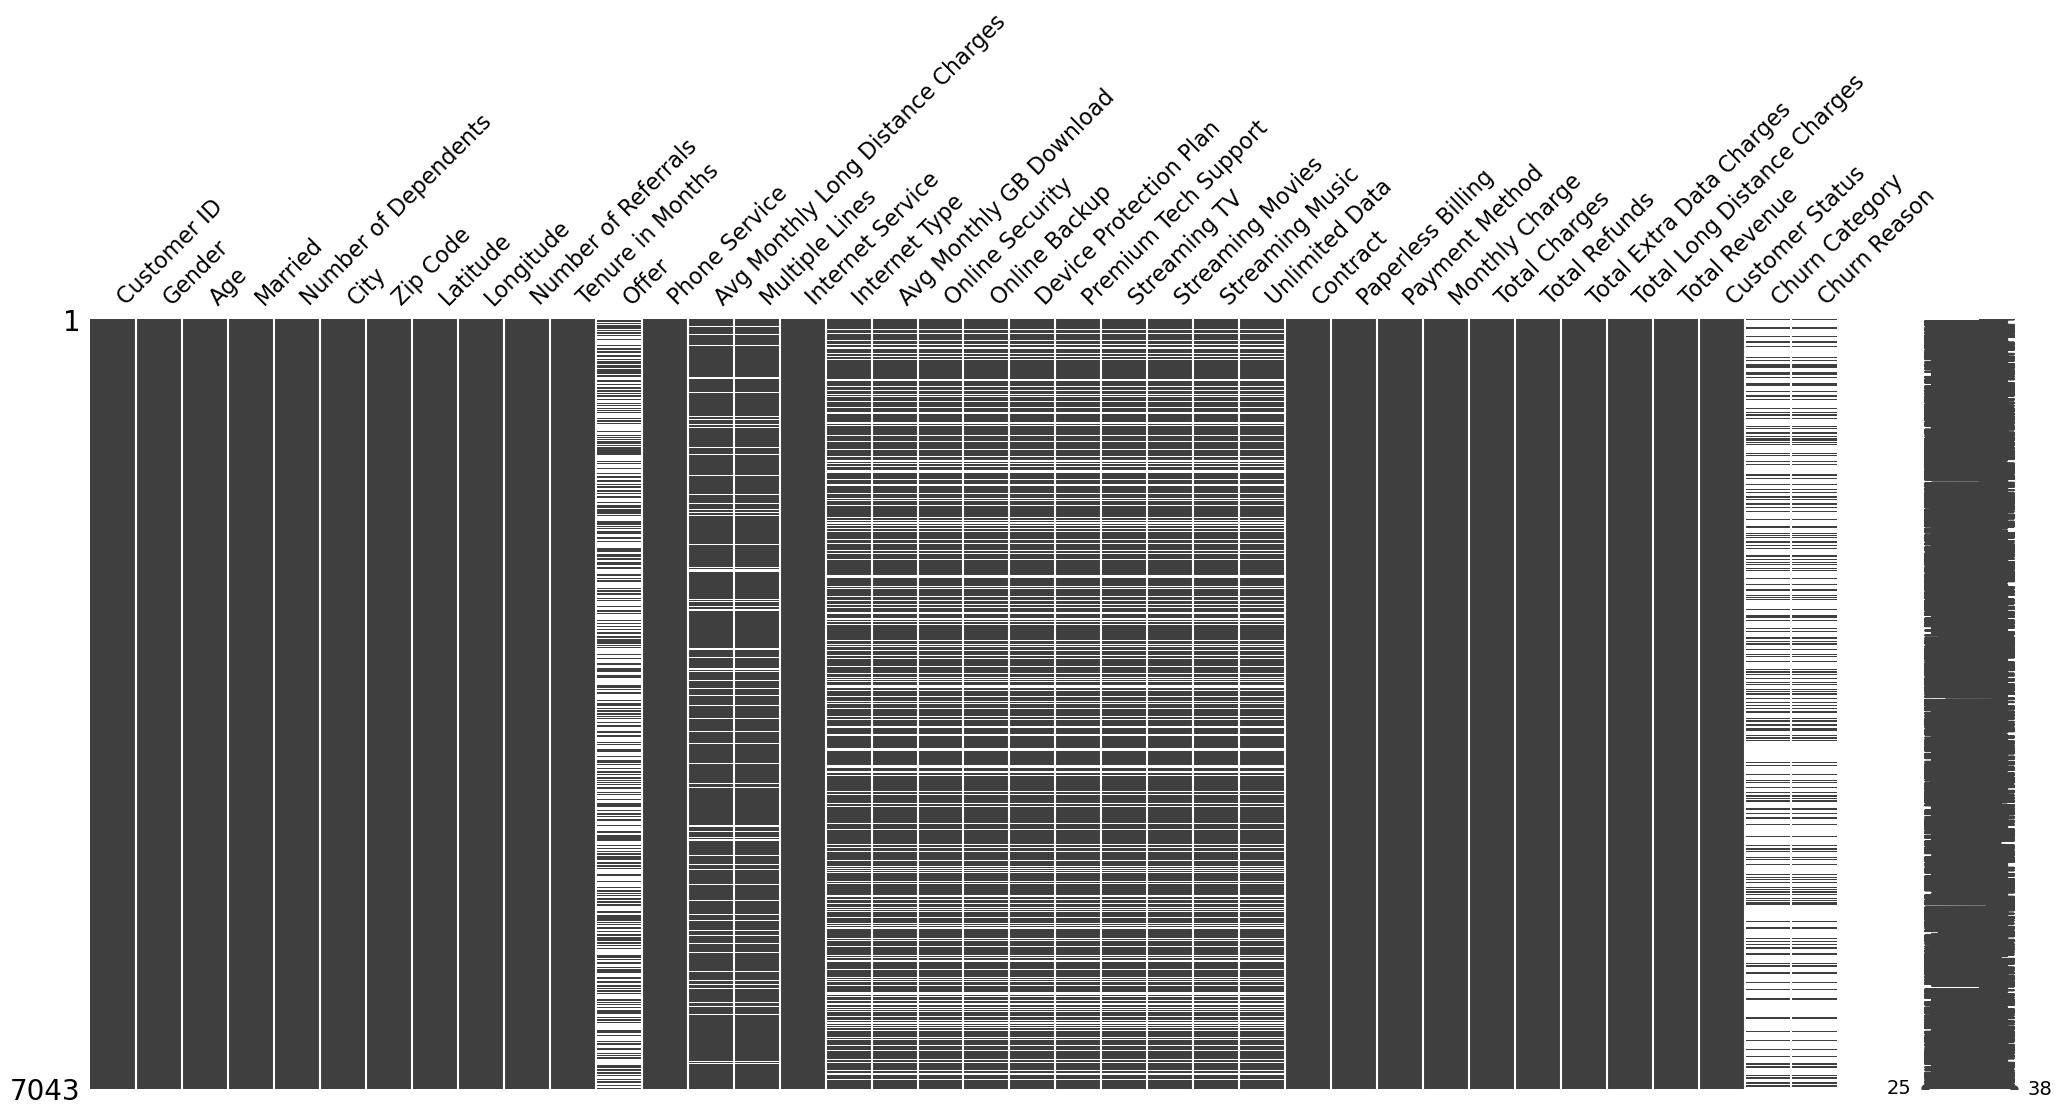

In [11]:
msno.matrix(dataset)

<p><b>The missing values matrix reveals areas in the dataset where information is absent. White cells indicate locations with missing values, while black cells represent available data</b></p>

<p><b>Overall, several columns show gaps in informations, notably those related to offers, Internet services, monthly charges, additional features, churn reasons, and others.</b></p>


<h3 style="color: brown;">Checking for Duplicates in the Dataset</h3>

In [12]:
dataset.duplicated().sum()

0

<p><b>Aucune duplication n'a été détectée dans le dataset.</b></p>

<h3 style="color: brown;">Identification of Numerical and Categorical Columns</h3>

In [13]:
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != "object"] 
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == "object"] 

print("We have {} numerical features:\n {}\n".format(len(numeric_features),numeric_features))
print("We have {} categorical features:\n {}".format(len(categorical_features),categorical_features))

We have 15 numerical features:
 ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']

We have 23 categorical features:
 ['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']


<p><b>The code above identifies the numerical and categorical columns in the dataset. Here are some key points :</p>
<b><p>- There are 15 numerical columns, including 'Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', etc.</p></b>
<b><p>- There are 23 categorical columns, including 'Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service', and others.</p></b>
<p><b>This distinction is essential to perform specific analyses on each type of variable and to apply appropriate preprocessing steps.</b></p>

<h2 style="color: green;">II) Exploratory Data Analysis (EDA) </h2>

<h3 style="color: brown;">Bar Plot Visualization</h3>

<p><b>The bar_plot function creates a bar chart to visualize the distribution of values in the specified column of the dataset.</b></p>
 <p><b>The bars in the chart represent the proportion of each value within that column.</b></p>

In [14]:
def bar_plot(a):
    dataset[a].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('proportion')
    plt.title('distribution de '+str(a))
    return plt.show()

<p><b>This code uses the interactive interact function from the ipywidgets library to create an interactive interface that allows visualization of the plot for different categorical columns. The user can select a column from the list of categorical features.</b></p>

In [15]:
#pip install ipywidgets==8.1.1

In [16]:
interact(bar_plot,a=categorical_features)

interactive(children=(Dropdown(description='a', options=('Customer ID', 'Gender', 'Married', 'City', 'Offer', …

<function __main__.bar_plot(a)>

<p><b>This code again uses the interactive interact function with the bar_plot function, but this time it allows the user to select a column from the numerical features. The resulting graph visualizes the distribution of numerical values based on the customer’s status.</b></p>

In [17]:
interact(bar_plot,a=numeric_features)

interactive(children=(Dropdown(description='a', options=('Age', 'Number of Dependents', 'Zip Code', 'Latitude'…

<function __main__.bar_plot(a)>

<h3 style="color: brown;">Identification of Outliers </h3>

<p><b>This plot identifies outliers in the numerical features based on the customer’s status (active or churned).</b></p>

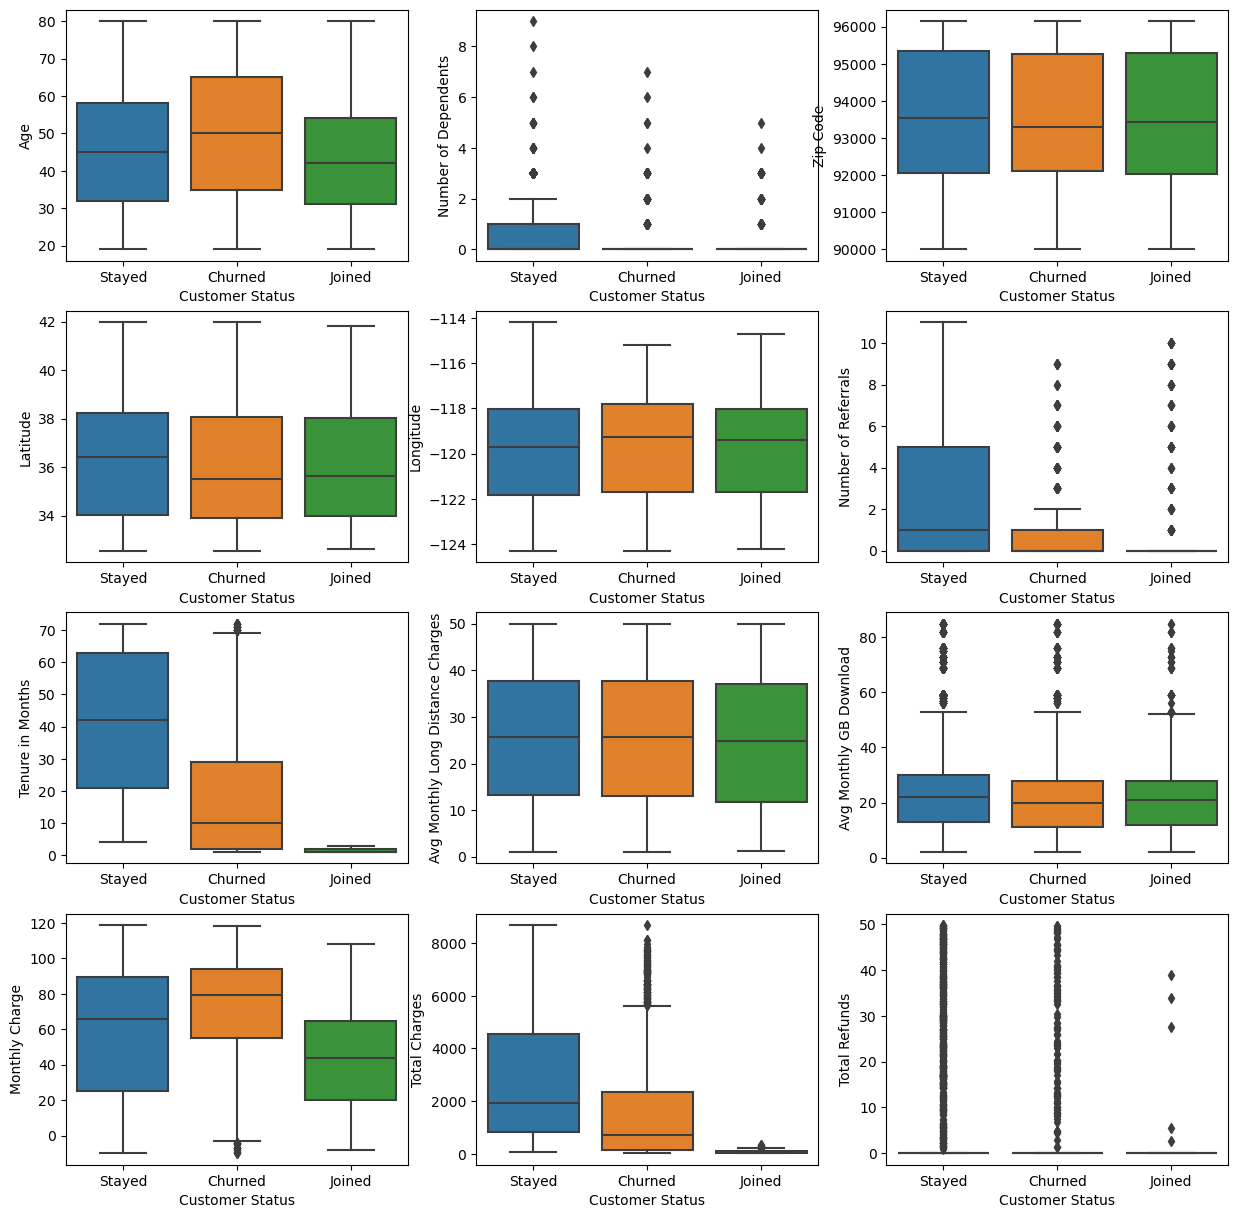

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

for i, subplot in zip(numeric_features, ax.flatten()):
    sns.boxplot(x='Customer Status', y=i, data=dataset, ax=subplot)

<p><b>From the graph visualizations, outliers are observed in the following columns :

'Number of Dependents',
'Avg Monthly GB Download',
'Total Refunds',
'Total Long Distance Charges',
'Total Revenue'</b></p>

<h3 style="color: brown;">Copy of Dataset</h3>

In [19]:
dataset_copy=dataset.copy()
dataset_copy

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


<p><b>The code creates a copy of the original dataset. The copy is named <code>dataset_copy</code>, and it is made to allow manipulations and modifications without altering the original dataset. This is commonly done to preserve the integrity of the original data while exploring and processing it.</b></p>
<p><b>The copied dataset (<code>dataset_copy</code>) is ready to be used for cleaning, transformation, or analysis operations without affecting the original dataset.</b></p>


<h3 style="color: brown;">Dropping Columns in the Dataset Copy</h3>

<p><b> Following an analysis of the graphs, certain columns were removed from the dataset. These columns were identified as containing either outliers or not contributing significantly to the analysis.</b></p>

In [20]:
dataset_copy.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason','Offer'],axis=1,inplace=True)
dataset_copy.drop(['City','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue','Number of Referrals'],inplace=True,axis=1)

<h3 style="color: brown;">Verification of Column Removal in the Dataset Copy</h3>

In [21]:
dataset_copy

,Gender,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status
0,Female,37,Yes,0,9,Yes,No,Yes,Cable,No,...,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,Stayed
1,Male,46,No,0,9,Yes,Yes,Yes,Cable,No,...,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,Stayed
2,Male,50,No,0,4,Yes,No,Yes,Fiber Optic,No,...,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,Churned
3,Male,78,Yes,0,13,Yes,No,Yes,Fiber Optic,No,...,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,Churned
4,Female,75,Yes,0,3,Yes,No,Yes,Fiber Optic,No,...,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,13,Yes,No,Yes,DSL,Yes,...,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,Stayed
7039,Male,40,Yes,0,22,Yes,Yes,Yes,Fiber Optic,No,...,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,Churned
7040,Male,22,No,0,2,Yes,No,Yes,DSL,No,...,No,No,No,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,Joined
7041,Male,21,Yes,0,67,Yes,No,Yes,Cable,Yes,...,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,Stayed


In [22]:
dataset_copy.shape

(7043, 23)

<h3 style="color: brown;">Traitement of "Total Charges"</h3>

<p><b>The distribution plot (displot) of the 'Total Charges' column in the dataset shows the distribution of total billed amounts.</b></p>

C:\Users\sanab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


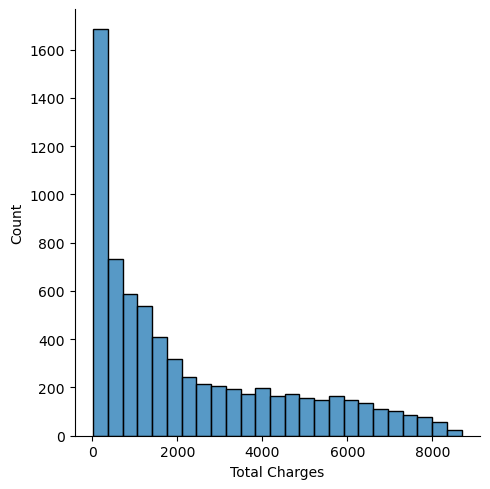

In [23]:
sns.displot(dataset['Total Charges'])

<p><b> The observation of the graph reveals an asymmetry that is not symmetrical around the center, indicating a possible non-normal distribution of total charges.</b></p>

In [24]:
dataset_copy['Total Charges'].skew() #Skewness measures the degree of asymmetry of a distribution around its mean

0.9637910860571924

<p><b>Calculation of the skewness for the 'Total Charges' column indicates a slight rightward tilt of the distribution (skewness = 0.964).</b></p>

In [25]:
dataset_copy['Total Charges'].sample(10)

2135    3848.80
2764    2186.40
6183    4750.95
51      3767.40
4242    2198.30
158      268.45
920       83.30
1132      49.65
5123    6985.65
2736    8289.20
Name: Total Charges, dtype: float64

<p><b>Display a random selection of 10 samples from the 'Total Charges' column.</b></p>

In [26]:
dataset_copy['Total Charges']=np.sqrt(dataset_copy['Total Charges'])

<p><b>By applying the square root transformation to the 'Total Charges' column, a modification is made to reduce the effects of the non-normal distribution, making the distribution of values closer to symmetry.</b></p>

In [27]:
dataset_copy['Total Charges'].skew()

0.31143070707337783

<p><b>The skewness coefficient of the 'Total Charges' column after applying the square root transformation is 0.31, suggesting a reduction in skewness compared to the original distribution.</b></p>

C:\Users\sanab\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


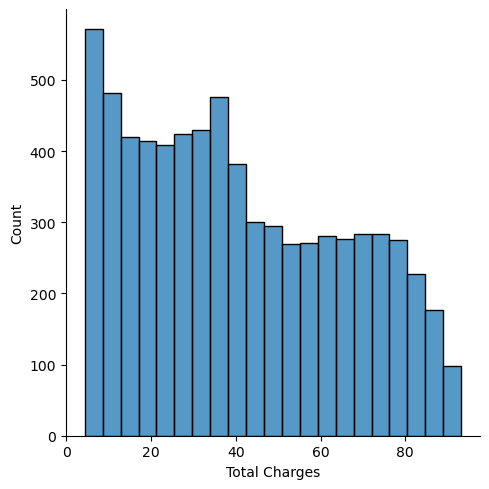

In [28]:
sns.displot(dataset_copy['Total Charges'])

<p><b>After applying the square root transformation, the graph shows a distribution of total charges that appears adjusted, with a tendency toward symmetry around the center compared to the original distribution.</b></p>

<p><b> The command returns the unique values present in the 'Contract' column. </b></p>

In [29]:
dataset_copy['Contract'].unique()

array(['One Year', 'Month-to-Month', 'Two Year'], dtype=object)

<p><b>The command returns the 'Tenure in Months' column. </b></p>

In [30]:
dataset_copy['Tenure in Months']

0        9
1        9
2        4
3       13
4        3
        ..
7038    13
7039    22
7040     2
7041    67
7042    63
Name: Tenure in Months, Length: 7043, dtype: int64

<p><b>The command returns the 'Monthly Charge' column. </b></p>

In [31]:
dataset_copy['Monthly Charge']

0       65.60
1       -4.00
2       73.90
3       98.00
4       83.90
        ...  
7038    55.15
7039    85.10
7040    50.30
7041    67.85
7042    59.00
Name: Monthly Charge, Length: 7043, dtype: float64

<p><b>After visualizing the 'Tenure in Months' and 'Monthly Charge' columns, it was decided to replace the 'Total Charge' variable using the formula :</b></p>
<p style="color: red;"><b>Total Charge = Tenure in Months * Monthly Charge</b></p>
<p><b>This formula was applied to transform the 'Total Charge' column from a categorical to a numerical representation based on subscription duration and monthly fees.</b></p>

<p><b>This code iterates over the indices of rows where the value in the 'Total Charges' column is missing. For each index, it checks the contract type ('Two year', 'One year', or other) and fills the missing value by multiplying the tenure ('Tenure in Months') by the monthly charge ('Monthly Charge') multiplied by the contract period (24 months for 'Two year', 12 months for 'One year', and the contract duration for others).</b></p>

In [32]:
ind = dataset_copy[dataset_copy['Total Charges'].isnull()].index.tolist()
for i in ind:
    if dataset_copy['Contract'].iloc[i,] == 'Two year':
         dataset_copy['Total Charges'].iloc[i,] = dataset_copy['Tenure in Months'].iloc[i,] * dataset_copy['Monthly Charge'].iloc[i,] * 24

    elif dataset_copy['Contract'].iloc[i,] == 'One year':
         dataset_copy['Total Charges'].iloc[i,] = dataset_copy['Tenure in Months'].iloc[i,] * dataset_copy['Monthly Charge'].iloc[i,] * 12
   
    else:
        dataset_copy['Total Charges'].iloc[i,] = dataset_copy['Tenure in Months'].iloc[i,] * dataset_copy['Monthly Charge'].iloc[i,]

<p><b>The code applies the square root transformation to the 'Total Charges' column. This transformation can be used to reduce the effect of extreme values or to make the distribution closer to normality.</b></p>

In [33]:
dataset_copy.nunique()

Gender                       2
Age                         62
Married                      2
Number of Dependents        10
Tenure in Months            72
Phone Service                2
Multiple Lines               2
Internet Service             2
Internet Type                3
Online Security              2
Online Backup                2
Device Protection Plan       2
Premium Tech Support         2
Streaming TV                 2
Streaming Movies             2
Streaming Music              2
Unlimited Data               2
Contract                     3
Paperless Billing            2
Payment Method               3
Monthly Charge            1591
Total Charges             6540
Customer Status              3
dtype: int64

<p><b>The code identifies categorical columns by selecting those that have fewer than 5 unique values. These categorical columns are stored in the list categorical_columns.</b></p>

In [34]:
categorial_columns=dataset_copy.nunique()[dataset_copy.nunique() < 5].keys().to_list()
categorial_columns

['Gender',
 'Married',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status']

<h3 style="color: brown;">Encoding the Binary Variable 'Gender'</h3>

In [35]:
dataset_copy['Gender']=dataset_copy['Gender'].apply(lambda row:1 if row=="Female" else 0)

<p><b>The command transforms the 'Gender' column by assigning the value 1 to entries labeled "Female" and 0 to others, thus creating a binary numerical representation for the gender variable.</b></p>

<h3 style="color: brown;">Encoding Other Binary Variables</h3>

In [36]:
binary_column=dataset_copy.drop('Gender',axis=1).nunique()[dataset_copy.drop('Gender',axis=1).nunique()<3].keys().to_list()
binary_column

['Married',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Paperless Billing']

<p><b>The command identifies binary columns in the dataset (`dataset_copy`) by excluding the 'Gender' column. These binary columns are those with fewer than three unique values. The list of these binary column names is stored in the variable <code>binary_column</code>.</b></p>


In [37]:
for column in binary_column:
    dataset_copy[column] = dataset_copy[column].apply(lambda row: 1 if row == 'Yes' else 0)

<p><b>For each binary column, it replaces the values "Yes" with 1 and all other values with 0, thereby creating a binary numerical representation for these variables.</b></p>


<p><b>After transforming the binary columns, let’s check the 'Married' column:</b></p>


In [38]:
dataset_copy['Married']

0       1
1       0
2       0
3       1
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: Married, Length: 7043, dtype: int64

<h3 style="color: brown;">Encoding Categorical Variables</h3>

In [39]:
remaining_cat_vars = dataset_copy[categorial_columns].nunique()[(dataset_copy[categorial_columns].nunique() > 2)].keys().to_list()

from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

# Select columns of object type (categorical)
categorical_columns = dataset_copy.select_dtypes(include='object').columns

# Replace values with numeric codes and keep NaN
for column in remaining_cat_vars:
    # Use cat.codes to convert values into numeric codes
    dataset_copy[column] = dataset_copy[column].astype('category').cat.codes
    
    # Replace NaN codes with NaN
    dataset_copy[column] = dataset_copy[column].replace(-1, np.nan)

<p><b>We identify the remaining categorical columns (remaining_cat_vars) in the dataset (dataset_copy) that have more than two unique values.</b></p>

<p><b> Using scikit-learn’s LabelEncoder, categorical values in these columns are replaced with numeric codes.</b></p>

<p><b>NaN codes are preserved during the conversion process.</b></p>

<h3 style="color: brown;">Filling Missing Values</h3>

<p><b> We display the number of missing values. </b></p>

In [40]:
dataset_copy.isna().sum()

Gender                       0
Age                          0
Married                      0
Number of Dependents         0
Tenure in Months             0
Phone Service                0
Multiple Lines               0
Internet Service             0
Internet Type             1526
Online Security              0
Online Backup                0
Device Protection Plan       0
Premium Tech Support         0
Streaming TV                 0
Streaming Movies             0
Streaming Music              0
Unlimited Data               0
Contract                     0
Paperless Billing            0
Payment Method               0
Monthly Charge               0
Total Charges                0
Customer Status              0
dtype: int64

<p><b>The 'Internet Type' column has 1,526 missing values .</b></p>


<p><b>We replace the missing values with the mean </b></p>


In [41]:
dataset_copy = dataset_copy.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

<p><b> We display the dataset to visualize the results </b></p>

In [42]:
dataset_copy

,Gender,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,...,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status
0,1,37,1,0,9,1,0,1,0.0,0,...,1,0,0,1,1,1,1,65.60,24.357750,2
1,0,46,0,0,9,1,1,1,0.0,0,...,0,1,1,0,0,0,1,-4.00,23.289483,2
2,0,50,0,0,4,1,0,1,2.0,0,...,0,0,0,1,0,1,0,73.90,16.758580,0
3,0,78,1,0,13,1,0,1,2.0,0,...,1,1,0,1,0,1,0,98.00,35.183093,0
4,1,75,1,0,3,1,0,1,2.0,0,...,1,0,0,1,0,1,1,83.90,16.352370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,20,0,0,13,1,0,1,1.0,1,...,0,0,1,1,1,0,1,55.15,27.256192,2
7039,0,40,1,0,22,1,1,1,2.0,0,...,0,1,1,1,0,1,0,85.10,43.286256,0
7040,0,22,0,0,2,1,0,1,1.0,0,...,0,0,0,1,0,1,1,50.30,9.630680,1
7041,0,21,1,0,67,1,0,1,0.0,1,...,0,1,1,1,2,0,1,67.85,68.026833,2


<p><b> We display the number of missing values </b></p>

In [43]:
dataset_copy.isnull().sum()

Gender                    0
Age                       0
Married                   0
Number of Dependents      0
Tenure in Months          0
Phone Service             0
Multiple Lines            0
Internet Service          0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charge            0
Total Charges             0
Customer Status           0
dtype: int64

<p><b> After handling the null values, there are no null values remaining in the dataset.</b></p>



<h3 style="color: brown;">Correlation Matrix with the Target Variable</h3>

<p><b>The commands perform a correlation analysis for the dataset. The correlation matrix is calculated for all variables, and the correlations of each variable with the 'Customer Status' column are sorted in descending order.</b></p>


In [44]:
correlation_matrix = dataset_copy.corr()
churn_correlation = correlation_matrix['Customer Status'].sort_values(ascending=False)
churn_correlation

Customer Status           1.000000
Contract                  0.490011
Tenure in Months          0.446411
Total Charges             0.323300
Number of Dependents      0.228119
Online Security           0.202201
Premium Tech Support      0.195722
Married                   0.194998
Online Backup             0.117566
Payment Method            0.112037
Device Protection Plan    0.108743
Multiple Lines            0.007639
Gender                   -0.004183
Streaming Music          -0.009178
Phone Service            -0.015263
Streaming Movies         -0.019541
Streaming TV             -0.021861
Age                      -0.100421
Unlimited Data           -0.139195
Monthly Charge           -0.139854
Internet Type            -0.143691
Paperless Billing        -0.169194
Internet Service         -0.196274
Name: Customer Status, dtype: float64

<p><b>High correlations with variables such as 'Contract', 'Tenure in Months', and 'Total Charges' suggest that longer contracts, greater tenure, and higher total charges are associated with a higher likelihood of customer retention.</b></p>

<p><b>Conversely, negative correlations with variables such as 'Internet Service', 'Paperless Billing', and 'Monthly Charge' indicate that certain Internet services, paperless billing, and higher monthly charges may be associated with a higher churn rate.</b></p>

<p><b>The heatmap above visualizes the correlation matrix between all variables in the dataset. The annotated values indicate the degree of correlation, ranging from -1 to 1. A darker color represents a stronger correlation. This plot allows for a quick visual identification of relationships between different variables.</b></p>


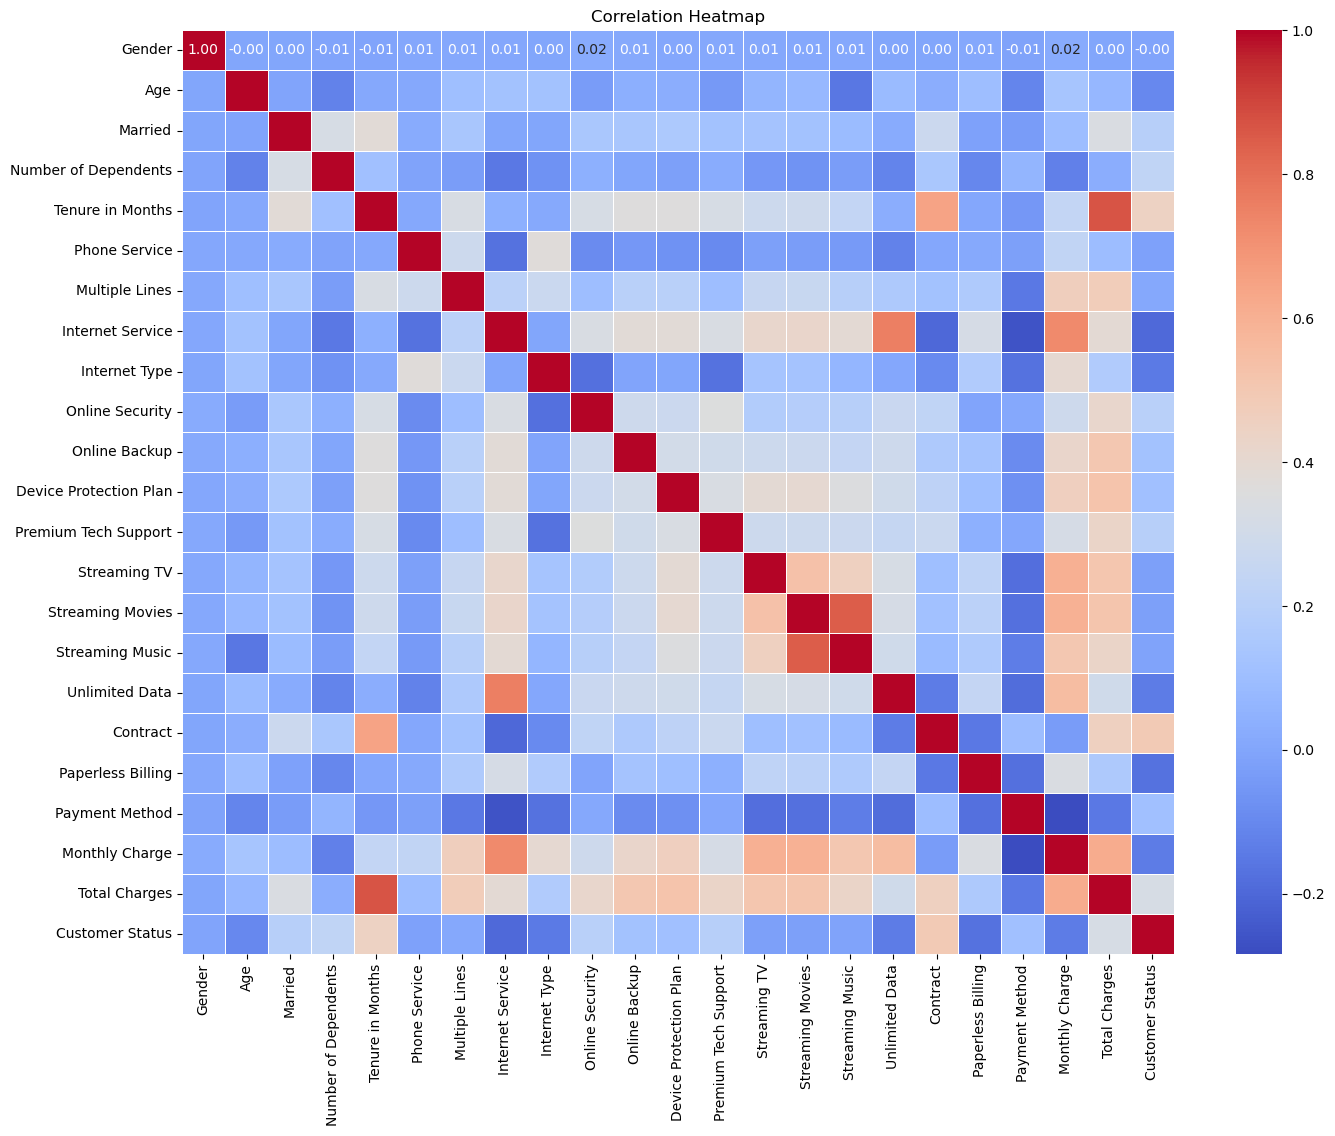

In [45]:
# Trace heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

<h3 style="color: brown;">Distribution of Variables </h3>

<p><b>The interactive function above uses the ipywidgets library to generate count plots, visualizing the distribution of each variable in the dataset. The user can select the variable to explore from the list of columns.</b></p>


In [46]:
from ipywidgets import fixed

def count_plot(a, dataset):
    plt.figure(figsize=(8, 6))
    
    # Utiliser countplot pour la colonne spécifiée
    sns.countplot(x=a, data=dataset, palette="viridis")
    plt.title(f'Distribution de la variable {a}')
    
    plt.show()

# Utiliser interact avec count_plot
interact(count_plot, a=dataset_copy.columns, dataset=fixed(dataset_copy))

interactive(children=(Dropdown(description='a', options=('Gender', 'Age', 'Married', 'Number of Dependents', '…

<function __main__.count_plot(a, dataset)>

<h3 style="color: brown;">Analysis of Variables Distribution </h3>

<p><b>The function above analyzes the distribution of numerical variables in the dataset. It calculates the mean, median, and standard deviation of each variable, then presents the results in a table.</b></p>


In [47]:
def analyze_distribution(dataset):
    # Initialize a list to store the results
    result_list = []

    # Loop through the columns and calculate statistics
    for column in dataset.columns:
        if pd.api.types.is_numeric_dtype(dataset[column]):
            # Calculate the mean
            mean_value = dataset[column].mean()

            # Calculate the median
            median_value = dataset[column].median()

            # Calculate the standard deviation
            std_dev_value = dataset[column].std()

            # Add the results to the list
            result_list.append({'Variable': column, 'Mean': mean_value, 'Median': median_value, 'Standard Deviation': std_dev_value})

    # Create a DataFrame from the list
    result_df = pd.DataFrame(result_list)

    return result_df

# Use the function with your dataset
distribution_analysis_result = analyze_distribution(dataset_copy)

# Display the results as a table
distribution_analysis_result


,Variable,Mean,Median,Standard Deviation
0,Gender,0.495244,0.000000,0.500013
1,Age,46.509726,46.000000,16.750352
2,Married,0.483033,0.000000,0.499748
3,Number of Dependents,0.468692,0.000000,0.962802
4,Tenure in Months,32.386767,29.000000,24.542061
5,Phone Service,0.903166,1.000000,0.295752
6,Multiple Lines,0.421837,0.000000,0.493888
7,Internet Service,0.783331,1.000000,0.412004
8,Internet Type,1.399674,1.399674,0.650925
9,Online Security,0.286668,0.000000,0.452237


<p><b>The table summarizes the key statistics for each numerical variable. Values such as the mean, median, and standard deviation provide an overview of the distribution and spread of the data for each feature.</b></p>


<h3 style="color: brown;">Detection and Handling of Outliers :</h3>

<p><b>The following numerical columns have been selected for further analysis :</b></p>

In [48]:
numerical_columns = ['Age','Number of Dependents','Tenure in Months','Monthly Charge', 'Total Charges']
numerical_columns

['Age',
 'Number of Dependents',
 'Tenure in Months',
 'Monthly Charge',
 'Total Charges']

<p><b>The code above generates boxplots to visualize the distribution of numerical variables according to the customer status (subscribed or churned). Each boxplot represents the spread of the data, helping to identify potential outliers within each customer category.</b></p>

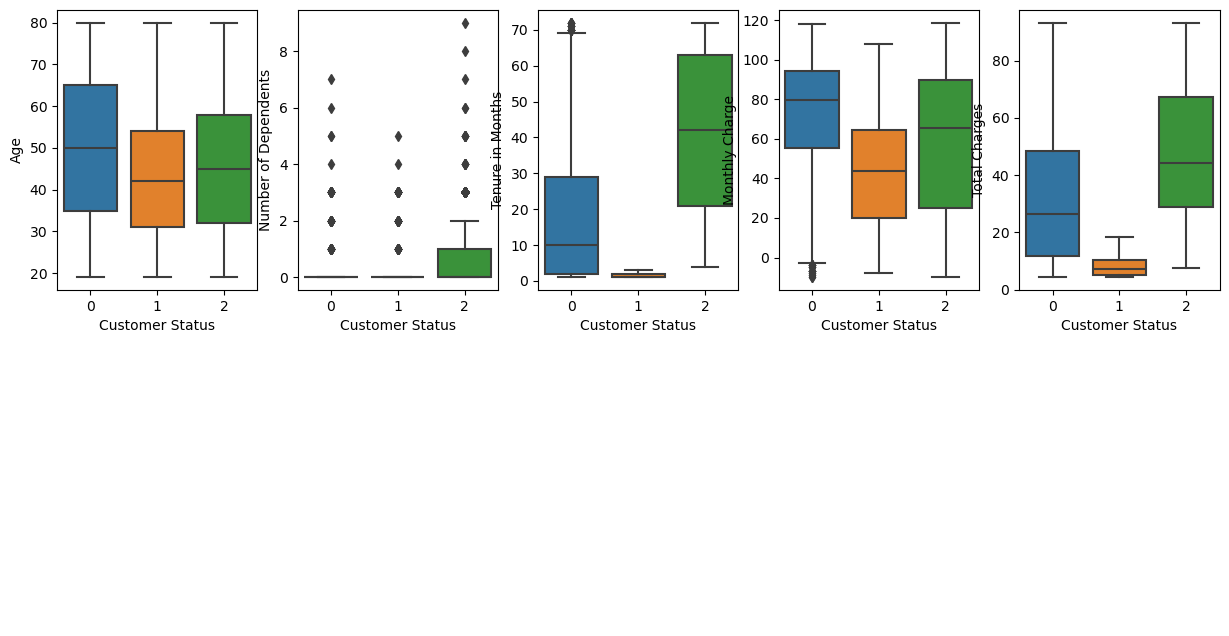

In [49]:
# Get the number of columns for the subplots
num_cols = len(numerical_columns)  # 3

# Calculate the number of rows to organize the subplots with at most 3 columns per row
num_rows = (num_cols - 1) // 3 + 1  # 4

# Plotting code
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the subplot axes
ax = ax.flatten()

# Plot only for the specified numerical columns
for i, subplot in zip(numerical_columns, ax):
    sns.boxplot(x='Customer Status', y=i, data=dataset_copy, ax=subplot)

# Remove any remaining empty subplots
for empty_subplot in ax[num_cols:]:
    empty_subplot.axis('off')

plt.show()

<p><b>After visualization, the 'Number of Dependents' column was adjusted to handle the identified outliers.</b></p>


<p><b>The code uses the Z-score test to detect outliers in the 'Number of Dependents' column. Z-scores measure how far a value deviates from the mean, and values beyond a specified threshold are adjusted to fall within the range defined by that threshold. This helps to handle outliers and ensure data stability.</b></p>

In [50]:
from scipy.stats import zscore

# Threshold for outliers
threshold = 1  # Adjust the threshold as needed

# Calculate the Z-scores
z_scores = zscore(dataset_copy['Number of Dependents'])

# Limit values beyond the threshold
limited_values = np.clip(dataset_copy['Number of Dependents'], -threshold, threshold)

# Replace the original column with the limited values
dataset_copy['Number of Dependents'] = limited_values

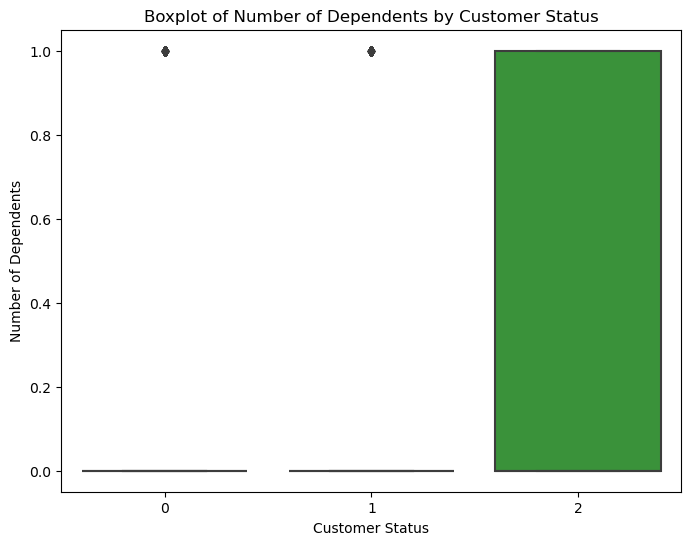

In [51]:
# Plotting code
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the boxplot for 'Number of Dependents'
sns.boxplot(x='Customer Status', y='Number of Dependents', data=dataset_copy, ax=ax)

plt.title('Boxplot of Number of Dependents by Customer Status')
plt.show()

<p><b>After applying the z-score and treating the outliers, the boxplot of the number of dependents ('Number of Dependents') by customer status ('Customer Status') no longer shows any outliers.</b></p>

<h3 style="color: brown;">Handling Data Imbalance :</h3>

<p><b>The features are extracted from the dataset by excluding the columns 'Customer Status' and 'Gender' to form the feature set X, while the column 'Customer Status' is used as the target variable Y.</b></p>

In [52]:
X = dataset_copy.drop(['Customer Status','Gender'], axis = 1)
Y = dataset_copy['Customer Status']


<p><b>Shape of Feature Set (X) and Target Set (Y) :</b></p>


In [53]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (7043, 21)
Y shape:  (7043,)


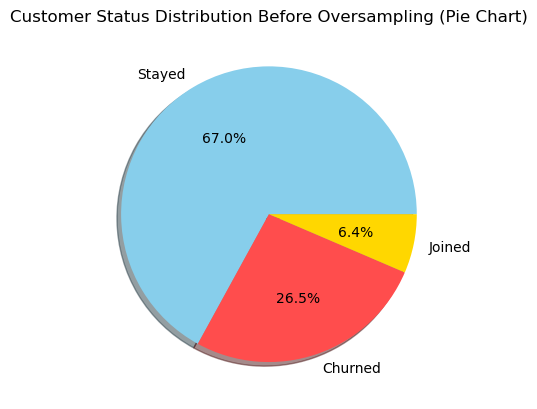

In [54]:
# Plot to Identify the Imbalance
labels =['Stayed','Churned','Joined']
pie_colors = ['skyblue','#ff4d4d','gold']
plt.pie(x=dataset_copy['Customer Status'].value_counts(),labels=labels,autopct='%1.1f%%',shadow=True,colors=pie_colors)
plt.title('Customer Status Distribution Before Oversampling (Pie Chart)')
plt.show()

<p><b>The pie chart illustrates the initial distribution of customer status before any balancing operation. There is a notable imbalance between the categories, with the majority of customers classified as "Stayed" (67.0%), followed by "Churned" (26.5%) and "Joined" (6.4%). </b></p>

<Axes: xlabel='Customer Status', ylabel='count'>

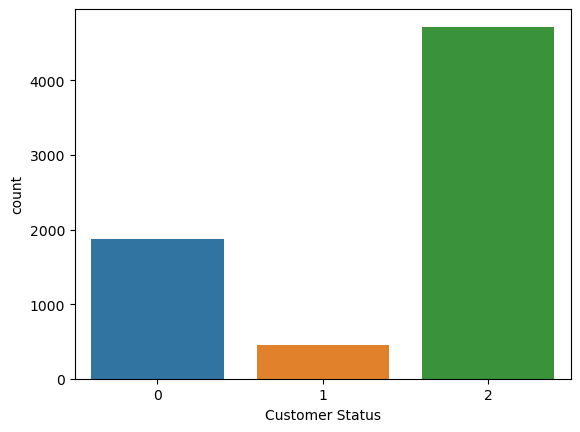

In [55]:
# Plot of  Y before reimbalance
sns.countplot(x=Y)

<p><b>This bar chart illustrates the initial distribution of customer status before any balancing operation. It clearly shows the imbalance, with a significantly higher number of customers in the "Stayed" category compared to the "Churned" and "Joined" categories.</b></p>

<h3 style="color: brown;">Oversampling method to balance the data :</h3>

<p><b>Installation of imbalanced-learn</b></p>

In [56]:
#pip install imbalanced-learn

<p><b>Updating scikit-learn and imbalanced-learn</b></p>

In [57]:
#pip install --upgrade scikit-learn imbalanced-learn

<p><b>The BorderlineSMOTE oversampling method is used to increase the dataset size by generating synthetic examples for the minority class (churned). This helps balance the proportions among the 'Stayed', 'Churned', and 'Joined' classes. The goal is to improve the performance of machine learning models by addressing the initial imbalance in the data.</b></p>

In [58]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X, Y = oversample.fit_resample(X, Y)

<Axes: xlabel='Customer Status', ylabel='count'>

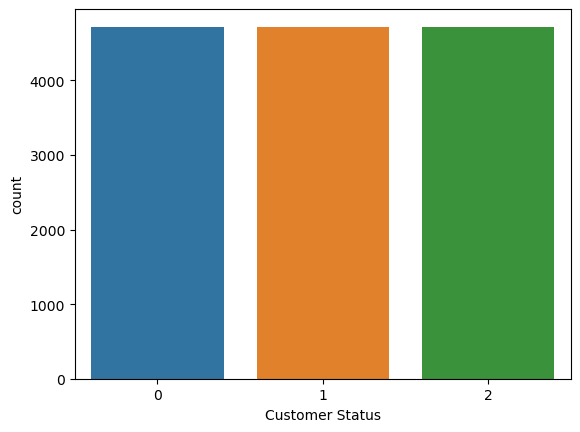

In [59]:
# Plot of  Y after reimbalance
sns.countplot(x=Y)

<p><b>The bar chart shows the distribution of customer status after applying the BorderlineSMOTE oversampling method. It can be observed that the 'Stayed', 'Churned', and 'Joined' classes are now more balanced.</b></p>

<p><b>Remove duplicates after oversampling</b></p>

In [60]:
# Check using shape to see the difference.
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (14160, 21)
Y shape:  (14160,)


<p><b>After balancing the data, the shape of X is (14160, 21) and the shape of Y is (14160,), indicating that BorderlineSMOTE oversampling was successfully applied to balance the classes.</b></p>

<h2 style="color: green;">III) Choice of machine learning algorithm </h2>

<h3 style="color: brown;">Algorithmes selection</h3>

<p><b>We chose to use the following algorithms for our tests: Random Forest, XGBoost, Logistic Regression, and Gradient Boosting. This selection was made by considering the advantages and disadvantages of each algorithm in the context of our prediction problem.</b></p>

<h3 style="color: brown;">Splitting the dataset into Training, Validation, and Test Sets</h3>

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1111,stratify=Y)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=1111, stratify=Y_test)

<p><b> The data is divided into three distinct sets: the training set, the validation set, and the test set, with respective proportions of 60%, 20%, and 20%. Stratification is used to maintain the class distribution in each set.</b></p>

In [62]:
pd.DataFrame(Y).value_counts(normalize=True)

Customer Status
0                  0.333333
1                  0.333333
2                  0.333333
Name: proportion, dtype: float64

In [63]:
pd.DataFrame(Y_val).value_counts(normalize=True)

Customer Status
0                  0.333333
1                  0.333333
2                  0.333333
Name: proportion, dtype: float64

In [64]:
pd.DataFrame(Y_train).value_counts(normalize=True)

Customer Status
0                  0.333333
1                  0.333333
2                  0.333333
Name: proportion, dtype: float64

In [65]:
pd.DataFrame(Y_test).value_counts(normalize=True)

Customer Status
0                  0.333333
1                  0.333333
2                  0.333333
Name: proportion, dtype: float64

<p><b>The results of the four commands show that the class distribution remains equal across all sets (train, validation, test) after the split, with each class representing approximately one-third (33.33%) of the corresponding dataset.</b></p>

<h3 style="color: brown;"> Training and evaluation</h3>

<h3 style="color: royalblue; font-size: 1.2em;">Random Forest</h3>

<p><b>Importing the RandomForestClassifier model and the associated metrics</b></p>

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

<p><b>Model initialization with a fixed random number generator to ensure reproducibility of results</b></p>

In [67]:
rf_classifier = RandomForestClassifier(random_state=42)

<p><b>The Random Forest model is trained on the training set (X_train and Y_train) using the method <code>fit</code></b></p>

In [68]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

<p><b>Random Forest model accuracy on the validation set uses the trained model to make predictions on (X_val)</b></p>

In [69]:
# Predictions on the validation set with Random Forest
rf_pred_val = rf_classifier.predict(X_val)

# Compute accuracy on the validation set with Random Forest
rf_accuracy_val = accuracy_score(Y_val, rf_pred_val)

# Display the accuracy on the validation set with Random Forest
print(f'Precision : {rf_accuracy_val}')

Precision : 0.8873587570621468


<p><b>The model's accuracy on the validation set of 0.8873 indicates that it correctly classified approximately 88.73% of the examples in that set. This is a measure of the model's ability to make correct predictions.</b></p>

<p></p>

<p><b>This calculates and displays the weighted F1 score for the validation set. </b></p>

In [70]:
# Calculation of the F1 score for the test set with Random Forest
f1score_val = f1_score(Y_val, rf_pred_val, average='weighted')

# Displaying the F1 score for the test set with Random Forest
print(f'\n F1 Score: {f1score_val}')


 F1 Score: 0.8861895594995215


<p><b>The F1 Score of 0.8909 is a metric that combines the model’s precision and recall. A high F1 Score suggests that the model maintains a good balance between correctly identifying positive examples and avoiding false positives.</b></p>

<p><b>This calculates and displays the weighted recall for the validation set using the Random Forest model. </b></p>

In [71]:
# Calculation of the recall score for the test set with Random Forest
recall_val = recall_score(Y_val, rf_pred_val, average='weighted')

# Displaying the recall score for the test set with Random Forest
print(f' Recall : {recall_val}')

 Recall : 0.8873587570621468


<p><b>This indicates that the Random Forest model has a recall of 88.73% on the validation set. In other words, it correctly identified approximately 88.73% of the positive cases in the validation set.</b></p>

<p><b>This displays the classification report for the validation set using the Random Forest model.</b></p>

In [72]:
# Displaying the classification report 

class_report_rf = classification_report(Y_val, rf_pred_val)
print("\nClassification Report:\n")
print(class_report_rf)


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       944
           1       0.91      0.98      0.95       944
           2       0.90      0.87      0.89       944

    accuracy                           0.89      2832
   macro avg       0.89      0.89      0.89      2832
weighted avg       0.89      0.89      0.89      2832



<p><b>The classification report summarizes the performance of the Random Forest model on the validation set. The overall accuracy of the model is 89%, meaning that 89% of the predictions are correct. The precision, recall, and F1-score for each class show that the model is effective at distinguishing between the different categories. </b></p>

<p><b> </b></p>

<p><b> Displays the confusion matrix showing the number of true positives, true negatives, false positives, and false negatives.
</b></p>

In [73]:
# Calculation of the confusion matrix
conf_matrix_rf_val = confusion_matrix(Y_val, rf_pred_val)

# Displaying confusion matrix
print("Confusion Matrix :\n")
print(conf_matrix_rf_val)

Confusion Matrix :

[[763  88  93]
 [ 19 925   0]
 [119   0 825]]


<p><b>The diagonal values represent the number of correct predictions for each class, while the off-diagonal values indicate classification errors. </b></p>

<p><b> </b></p>

<p><b>A visual chart that graphically illustrates the confusion matrix for a better understanding of the model’s performance.
 </b></p>

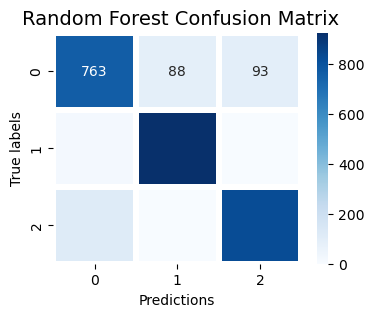

In [74]:
# Plot of confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_rf_val,annot=True,fmt = "d",cmap='Blues',linewidths=3)

plt.title(" Random Forest Confusion Matrix",fontsize=14)
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

<p><b>This code uses the One-vs-Rest approach to extend the Random Forest model to a multiclass problem. It then trains the extended model on the training set and uses probability predictions to calculate the ROC curves and the areas under the ROC curve (ROC AUC) for each class.</b></p>

In [75]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
# Use OneVsRestClassifier to handle multiclass ROC
classifier = OneVsRestClassifier(rf_classifier)

# Fit the classifier on the training set 
classifier.fit(X_train, Y_train)

# Make probability predictions
y_rfpred_prob = classifier.predict_proba(X_val)

# Calculate the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_val))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_val == i).astype(int), y_rfpred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<p><b>This generates and displays the ROC curve to evaluate the model’s performance. </b></p>

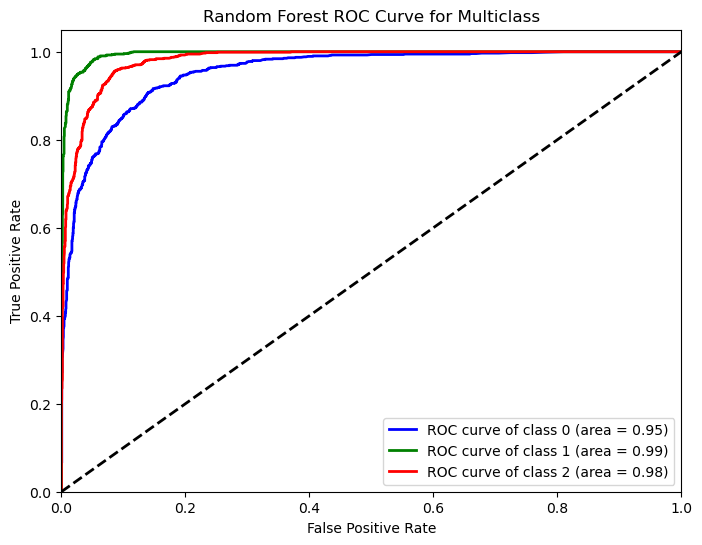

In [76]:
# Plot of ROC curve 
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

<p><b> </b></p>

<h3 style="color: royalblue; font-size: 1.2em;">XGBoost classifier</h3>

<p><b>Installation of xgboost</b></p>

In [77]:
#pip install xgboost

<p><b>XGBClassifier Importation </b></p>

In [78]:
from xgboost import XGBClassifier

<p><b> Model initialization </b></p>

In [79]:
xgb_classifier = XGBClassifier(random_state=42)

<p><b> Training on the training set </b></p>

In [80]:
xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

<p><b> Predictions on the validation set</b></p>

In [81]:
xgb_pred_val = xgb_classifier.predict(X_val)
xgb_accuracy_val = accuracy_score(Y_val, xgb_pred_val)
print(f'Precision: {xgb_accuracy_val}')

Precision: 0.8972457627118644


<p><b>Calculation of the F1 score for the validation set</b></p>

In [82]:
f1_score_xgb = f1_score(Y_val, xgb_pred_val, average='weighted')
print(f' F1-Score : {f1_score_xgb}')

 F1-Score : 0.8962501215563696


<p><b>Calculation of the recall score for the validation set</b></p>

In [83]:
recall_xgb = recall_score(Y_val, xgb_pred_val, average='weighted')
print(f' Recall : {recall_xgb}')

 Recall : 0.8972457627118644


<p><b>Displaying the classification report</b></p>

In [84]:
class_report_xgb = classification_report(Y_val, xgb_pred_val)
print('\nClassification Report :\n', class_report_xgb)


Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       944
           1       0.92      0.98      0.95       944
           2       0.90      0.89      0.90       944

    accuracy                           0.90      2832
   macro avg       0.90      0.90      0.90      2832
weighted avg       0.90      0.90      0.90      2832



<p><b>  Calculation and display of the confusion matrix on the validation set </b></p>

In [85]:
conf_matrix_xgb_val = confusion_matrix(Y_val, xgb_pred_val)
print("\nConfusion Matrix :\n", conf_matrix_xgb_val)


Confusion Matrix :
 [[775  78  91]
 [ 20 924   0]
 [102   0 842]]


<p><b>Plot of the confusion matrix </b></p>

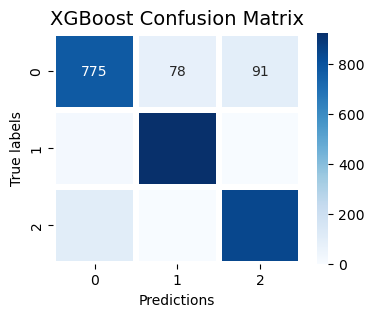

In [86]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_xgb_val,annot=True,fmt = "d",cmap='Blues',linewidths=3)

plt.title("XGBoost Confusion Matrix",fontsize=14)
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

<p><b>Preparing the XGBoost classifier for the ROC curve</b></p>

In [88]:
from sklearn.preprocessing import label_binarize
# Use OneVsRestClassifier to handle multiclass ROC
xgb_classifier = OneVsRestClassifier(XGBClassifier(random_state=46))

# Fit the classifier on the training set 
xgb_classifier.fit(X_train, Y_train)

# Make probability predictions
xgb_pred_prob = xgb_classifier.predict_proba(X_val)

# Binarize labels
y_val_bin = label_binarize(Y_val, classes=xgb_classifier.classes_)

# Calculate the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y_val))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], xgb_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

<p><b>Plot of ROC curve </b></p>

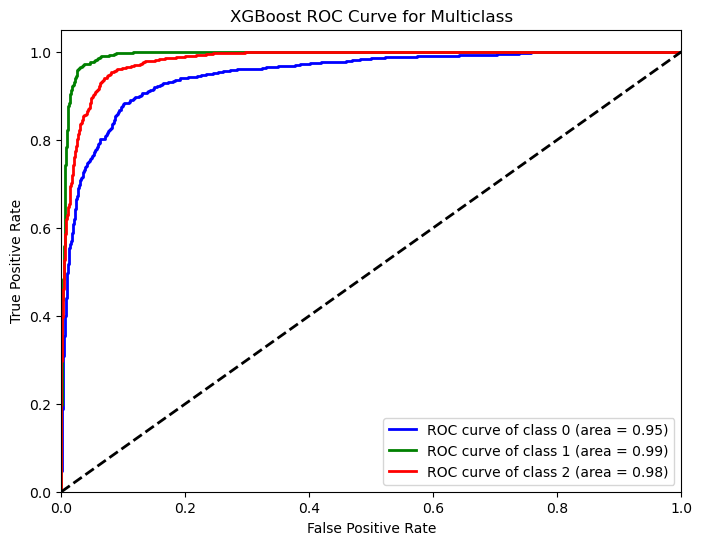

In [89]:
# Tracé de la courbe ROC 
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

<h3 style="color: royalblue; font-size: 1.2em;">Logistic Regression</h3>

<p><b>Model Importation </b></p>

In [90]:
from sklearn.linear_model import LogisticRegression

<p><b>Model Initialization </b></p>

In [91]:
logreg_classifier = LogisticRegression(random_state=42)

<p><b>Training the model on the training set</b></p>

In [92]:
logreg_classifier.fit(X_train, Y_train)

C:\Users\sanab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

<p><b>Prediction on the validation set with the model and calculation of accuracy</b></p>

In [93]:
logreg_pred_val = logreg_classifier.predict(X_val)
logreg_accuracy_val = accuracy_score(Y_val, logreg_pred_val)
print(f'Precision : {logreg_accuracy_val}')

Precision : 0.8036723163841808


<p><b>Calculation of the F1 score for the validation set with the model </b></p>

In [94]:
f1_score_logreg = f1_score(Y_val, logreg_pred_val, average='weighted')
print(f' F1-Score : {f1_score_logreg}')

 F1-Score : 0.800868864691182


<p><b>Calculation of the recall score for the validation set with the model </b></p>

In [95]:
recall_logreg = recall_score(Y_val, logreg_pred_val, average='weighted')
print(f' Recall: {recall_logreg}')

 Recall: 0.8036723163841808


<p><b>Calculation and display of the classification report for the model </b></p>

In [96]:
class_report_logreg = classification_report(Y_val, logreg_pred_val)
print('\nClassification Report:\n', class_report_logreg)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.71       944
           1       0.80      0.94      0.86       944
           2       0.87      0.80      0.83       944

    accuracy                           0.80      2832
   macro avg       0.80      0.80      0.80      2832
weighted avg       0.80      0.80      0.80      2832



<p><b>Calculation and display of the confusion matrix for the model</b></p>

In [97]:
conf_matrix_logreg_val = confusion_matrix(Y_val, logreg_pred_val)
print("\nConfusion Matrix :\n\n", conf_matrix_logreg_val)


Confusion Matrix :

 [[636 212  96]
 [ 40 884  20]
 [182   6 756]]


<p><b>Plot of the confusion matrix for the model </b></p>


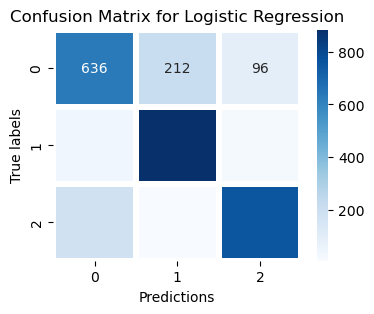

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix_logreg_val, annot=True,fmt = "d",cmap='Blues',linewidths=3)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

<p><b>Using OneVsRestClassifier to handle the multiclass ROC curve with the model </b></p>

In [99]:
# Use OneVsRestClassifier to handle multiclass ROC
classifier_lr = OneVsRestClassifier(logreg_classifier)

# Fit the classifier on the training set 
classifier_lr.fit(X_train, Y_train)

# Make probability predictions
y_lr_pred_prob = classifier_lr.predict_proba(X_val)

# Calculate the ROC curve and ROC AUC for each class
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
n_classes_lr = len(np.unique(Y_val))

for i in range(n_classes_lr):
    fpr_lr[i], tpr_lr[i], _ = roc_curve((Y_val == i).astype(int), y_lr_pred_prob[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

C:\Users\sanab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

<p><b>Plot of ROC curve for the model </b></p>

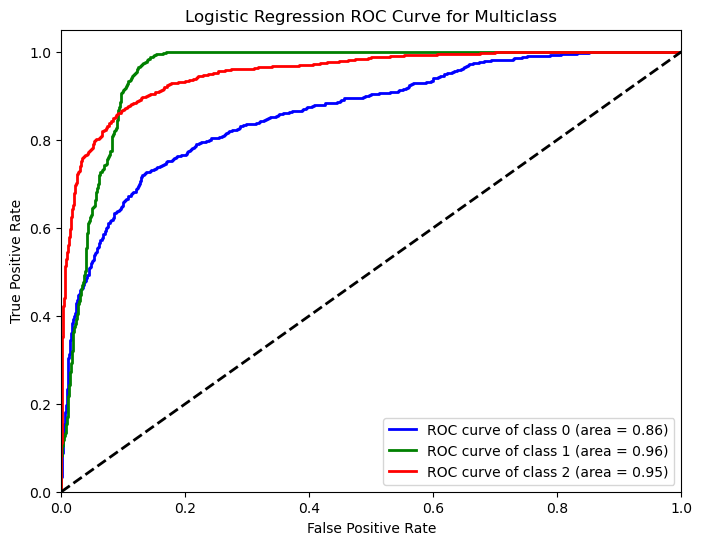

In [100]:
# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
colors_lr = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes_lr), colors_lr):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

<h3 style="color: royalblue; font-size: 1.2em;">Gradient Boosting</h3>

<p><b>Model Importation</b></p>

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

<p><b>Model Initialization</b></p>

In [102]:
gb_classifier = GradientBoostingClassifier(random_state=42)

<p><b>Training the model on the training set</b></p>

In [103]:
gb_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

<p><b>Prediction on the validation set with the model and calculation of accuracy</b></p>

In [104]:
gb_pred_val = gb_classifier.predict(X_val)
gb_accuracy_val = accuracy_score(Y_val, gb_pred_val)
print(f'Precision : {gb_accuracy_val}')

Precision : 0.8502824858757062


<p><b>Calculation of the F1 score for the validation set with the model</b></p>

In [105]:
f1_score_gb = f1_score(Y_val, gb_pred_val, average='weighted')
print(f' F1-Score : {f1_score_gb}')

 F1-Score : 0.8474425974824512


<p><b>Calculation of the recall score for the validation set with the model</b></p>

In [106]:
recall_gb = recall_score(Y_val, gb_pred_val, average='weighted')
print(f' Recall: {recall_gb}')

 Recall: 0.8502824858757062


<p><b>Calculation and display of the classification report for the model</b></p>

In [107]:
class_report_gb = classification_report(Y_val, gb_pred_val)
print('\nClassification Report:\n', class_report_gb)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76       944
           1       0.85      0.98      0.91       944
           2       0.90      0.85      0.87       944

    accuracy                           0.85      2832
   macro avg       0.85      0.85      0.85      2832
weighted avg       0.85      0.85      0.85      2832



<p><b>Calculation and display of the confusion matrix for the model</b></p>

In [108]:
conf_matrix_gb_val = confusion_matrix(Y_val, gb_pred_val)
print("\nConfusion Matrix :\n\n", conf_matrix_gb_val)


Confusion Matrix :

 [[684 167  93]
 [ 18 926   0]
 [146   0 798]]


<p><b>Plot of the confusion matrix for the model</b></p>

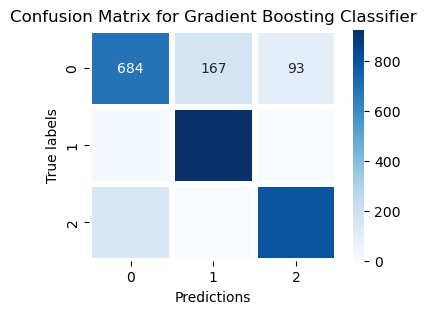

In [109]:
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_gb_val, annot=True, fmt="d", cmap='Blues', linewidths=3)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.show()

<p><b>Using OneVsRestClassifier to handle the multiclass ROC curve with the model</b></p>

In [110]:
# Use OneVsRestClassifier to handle multiclass ROC
classifier_gb = OneVsRestClassifier(gb_classifier)

# Fit the classifier on the training set 
classifier_gb.fit(X_train, Y_train)

# Make probability predictions
y_gb_pred_prob = classifier_gb.predict_proba(X_val)

# Calculate the ROC curve and ROC AUC for each class
fpr_gb = dict()
tpr_gb = dict()
roc_auc_gb = dict()
n_classes_gb = len(np.unique(Y_val))

for i in range(n_classes_gb):
    fpr_gb[i], tpr_gb[i], _ = roc_curve((Y_val == i).astype(int), y_gb_pred_prob[:, i])
    roc_auc_gb[i] = auc(fpr_gb[i], tpr_gb[i])

<p><b>Plot of ROC curve for the model</b></p>

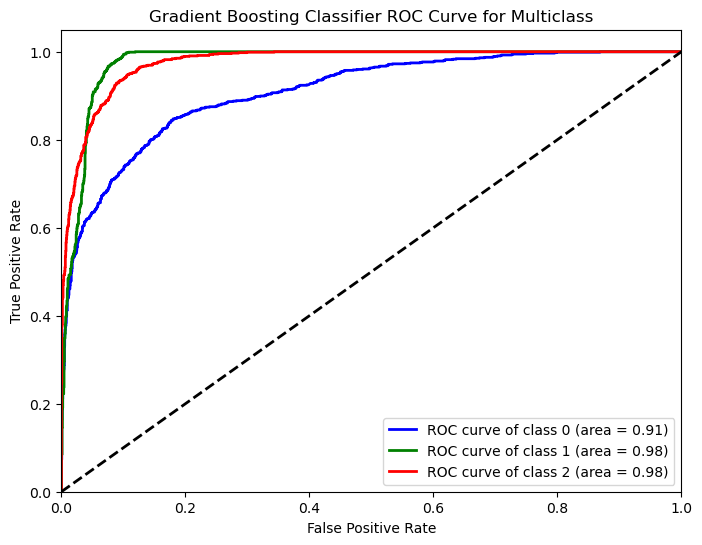

In [111]:
# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
colors_gb = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, color in zip(range(n_classes_gb), colors_gb):
    plt.plot(fpr_gb[i], tpr_gb[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_gb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()

<h3 style="color: brown;">Performances comparison </h3>

<h3 style="color: royalblue; font-size: 1.2em;">Lazy Predict</h3>

<p><b>Installation of Lazy Predict</b></p>

In [ ]:
#!pip install lazypredict

<p><b>Importing the necessary libraries</b></p>

In [112]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

<p><b>Initialization of Lazy Classifier </b></p>

In [113]:
clf = LazyClassifier()

<p><b>Fitting the model on the training and validation data </b></p>

In [114]:
models, predictions = clf.fit(X_train, X_val, Y_train,Y_val)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 848
[LightGBM] [Info] Number of data points in the train set: 8496, number of used features: 21
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


<p><b>Displaying the models and their performance metrics</b></p>

In [115]:
print(predictions)

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.90               0.90    None      0.90   
LGBMClassifier                     0.89               0.89    None      0.89   
RandomForestClassifier             0.89               0.89    None      0.89   
ExtraTreesClassifier               0.88               0.88    None      0.88   
BaggingClassifier                  0.88               0.88    None      0.88   
DecisionTreeClassifier             0.85               0.85    None      0.85   
ExtraTreeClassifier                0.83               0.83    None      0.83   
SVC                                0.83               0.83    None      0.82   
LabelPropagation                   0.82               0.82    None      0.82   
LabelSpreading                     0.82               0.82    None      0.82   
QuadraticDiscriminantAnalysis      0.82 

<p><b> The output displays the accuracy, balanced accuracy, ROC AUC, F1 Score, and the time taken by each model. XGBoost appears to be the best model with an accuracy of 0.90.</b></p>

<h3 style="color: royalblue; font-size: 1.2em;">Comparison using the Tabulate library</h3>

<p><b>This code compares the performance of several models—including Random Forest, Logistic Regression, Gradient Boosting, and XGBoost—in terms of accuracy. The model with the highest accuracy is selected.</b></p>

In [117]:
# Import the tabulate library for creating tables
from tabulate import tabulate

# Suppose you have the following variables
accuracies = {
    'Random Forest': rf_accuracy_val,
    'Logistic Regression': logreg_accuracy_val,
    'Gradient Boosting ': gb_accuracy_val,
    'XGBoost': xgb_accuracy_val
}

# Create a list of tuples for the table
table_data = [(model, accuracy) for model, accuracy in accuracies.items()]

# Display the table
print(tabulate(table_data, headers=['Model', 'Accuracy'], tablefmt='grid'))

# Find the best model
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print(f'\nBest Model: {best_model} with an Accuracy of: {best_accuracy}')


+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Random Forest       |   0.887359 |
+---------------------+------------+
| Logistic Regression |   0.803672 |
+---------------------+------------+
| Gradient Boosting   |   0.850282 |
+---------------------+------------+
| XGBoost             |   0.897246 |
+---------------------+------------+

Best Model: XGBoost with an Accuracy of: 0.8972457627118644


<p><b>The table shows the accuracy of models such as Random Forest, Logistic Regression, Gradient Boosting, and XGBoost. Based on accuracy, the XGBoost model is selected as the best with an accuracy of 0.897.</b></p>

<h3 style="color: brown;">Cross Validation </h3>

<p><b>This code uses 5-fold cross-validation to evaluate the performance of models such as Random Forest, Logistic Regression, and XGBoost. The scores for each model are stored in a DataFrame, with the average scores displayed for each model.</b></p>

In [118]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Define classifiers
rf_classifier = RandomForestClassifier()
logreg_classifier = LogisticRegression()
xgb_classifier = XGBClassifier()

# Create a list of classifiers
classifiers = [rf_classifier, logreg_classifier, xgb_classifier]

# List of classifier names
classifier_names = ['Random Forest', 'Logistic Regression', 'XGBoost']

# Create a DataFrame to store results
results_df = pd.DataFrame(index=classifier_names, columns=['Scores', 'Mean'])

# Loop over classifiers
for clf_name, clf in zip(classifier_names, classifiers):
    # Apply 5-fold cross-validation
    cv_scores = cross_val_score(clf, X_val, Y_val, cv=5, scoring='accuracy')
    
    # Calculate the mean of the scores
    mean_accuracy = np.mean(cv_scores)
    formatted_mean = '{:.10f}'.format(mean_accuracy)

    # Store the scores in the DataFrame as a list
    results_df.loc[clf_name, 'Scores'] = [cv_scores]

    # Store the mean score in the DataFrame
    results_df.loc[clf_name, 'Mean'] = formatted_mean


<p><b>Displaying the results in table format</b></p>

In [119]:
results_df

,Scores,Mean
Random Forest,"[[0.8483245149911817, 0.8747795414462081, 0.86...",0.8605218714
Logistic Regression,"[[0.7971781305114638, 0.8165784832451499, 0.79...",0.8008431955
XGBoost,"[[0.8395061728395061, 0.8871252204585538, 0.86...",0.8644075507


<p><b>The mean provides an indication of the model’s average performance across different subsets of the data. XGBoost appears to be the best model in terms of average accuracy. </b></p>

<h3 style="color: brown;">Evaluation on the test set </h3>

<p><b>This code allows to evaluate the model XGBoost regression model, on a test set. The user is prompted to manually provide values for the model’s variables, such as age, marital status, number of dependents, etc. Binary variables are handled as 0 or 1 (No or Yes).

The code creates a dictionary to store the variable values, asks the user to input these values for each variable, then uses these inputs to make a prediction with the previously trained XGBoost model.

Finally, the prediction result is displayed, indicating whether the customer is likely to have "Joined," "Stayed," or "Churned" based on the provided features.</b></p>

In [120]:
# Define the variable names
variable_names = ['Age', 'Married', 'Number of Dependents', 'Tenure in Months',
                   'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
                   'Online Security', 'Online Backup', 'Device Protection Plan',
                   'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                   'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
                   'Payment Method', 'Monthly Charge', 'Total Charges']

# Define the binary variable names
binary_variable_names = ['Married', 'Phone Service', 'Multiple Lines', 'Internet Service',
                         'Online Security', 'Online Backup', 'Device Protection Plan',
                         'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                         'Streaming Music', 'Unlimited Data', 'Paperless Billing']

# Create a dictionary to store the values
variables = {}

# Enter values via keyboard for the binary variables (0 or 1)
for variable_name in binary_variable_names:
    while True:
        value = input(f"Entrez The value for '{variable_name}' (0 for No, 1 for Yes): ")
        if value in ['0', '1']:
            variables[variable_name] = int(value)
            break
        else:
            print("Error: Please enter a valid value (0 or 1). Try again.")

# Enter values via keyboard for the other variables 
for variable_name in set(variable_names) - set(binary_variable_names):
    value = input(f"Entrez la valeur pour '{variable_name}': ")
    variables[variable_name] = int(value) if variable_name not in ['Payment Method', 'Contract', 'Internet Type'] else value
# Display the dictionnary

variable_array = np.array([list(variables[name] for name in X_train.columns)], dtype=float)
xgb_classifier.fit(X_train, Y_train)
xgb_predictions = xgb_classifier.predict(variable_array)

# Display the predictions

print("/n")
print("Predictions:", xgb_predictions)
if xgb_predictions == 1:
    result_label = 'Joined'
elif xgb_predictions == 2:
    result_label = 'Stayed'
else:
    result_label = 'Churned'

print(f"Result: {result_label}")

Entrez The value for 'Married' (0 for No, 1 for Yes):  1
Entrez The value for 'Phone Service' (0 for No, 1 for Yes):  1
Entrez The value for 'Multiple Lines' (0 for No, 1 for Yes):  1
Entrez The value for 'Internet Service' (0 for No, 1 for Yes):  1
Entrez The value for 'Online Security' (0 for No, 1 for Yes):  1
Entrez The value for 'Online Backup' (0 for No, 1 for Yes):  


Error: Please enter a valid value (0 or 1). Try again.


Entrez The value for 'Online Backup' (0 for No, 1 for Yes):  1
Entrez The value for 'Device Protection Plan' (0 for No, 1 for Yes):  1
Entrez The value for 'Premium Tech Support' (0 for No, 1 for Yes):  1
Entrez The value for 'Streaming TV' (0 for No, 1 for Yes):  1
Entrez The value for 'Streaming Movies' (0 for No, 1 for Yes):  1
Entrez The value for 'Streaming Music' (0 for No, 1 for Yes):  1
Entrez The value for 'Unlimited Data' (0 for No, 1 for Yes):  1
Entrez The value for 'Paperless Billing' (0 for No, 1 for Yes):  1
Entrez la valeur pour 'Monthly Charge':  123
Entrez la valeur pour 'Tenure in Months':  12
Entrez la valeur pour 'Total Charges':  200
Entrez la valeur pour 'Contract':  1
Entrez la valeur pour 'Payment Method':  1
Entrez la valeur pour 'Internet Type':  1
Entrez la valeur pour 'Age':  28
Entrez la valeur pour 'Number of Dependents':  10


/n
Predictions: [2]
Result: Stayed
